# Model Overfitting

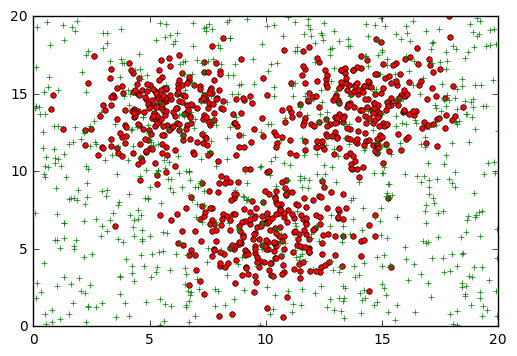

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
x1, y1 = np.random.multivariate_normal(mean1, cov, N/6).T
x2, y2 = np.random.multivariate_normal(mean2, cov, N/6).T
x3, y3 = np.random.multivariate_normal(mean3, cov, N/6).T
x4 = 20*np.random.random(N/2)
y4 = 20*np.random.random(N/2)

plt.plot(x1,y1,'ro',x2,y2,'ro',x3,y3,'ro',x4,y4,'g+',ms=4)

In [7]:
X = np.array([x1,y1]).T
X = np.concatenate((X, np.array([x2,y2]).T), axis=0)
X = np.concatenate((X, np.array([x3,y3]).T), axis=0)
X = np.concatenate((X, np.array([x4,y4]).T), axis=0)
Y = np.concatenate((np.ones(N/2),np.zeros(N/2)))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

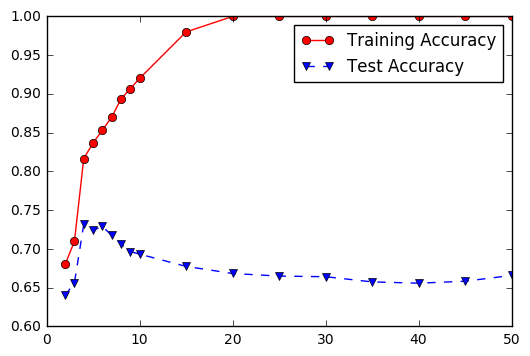

In [10]:
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])

In [11]:
depth = 20
clf = tree.DecisionTreeClassifier(max_depth=depth)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
AccTrain = accuracy_score(Y_train, Y_predTrain)
AccTest = accuracy_score(Y_test, Y_predTest)
[AccTrain, AccTest]

[1.0, 0.66083333333333338]

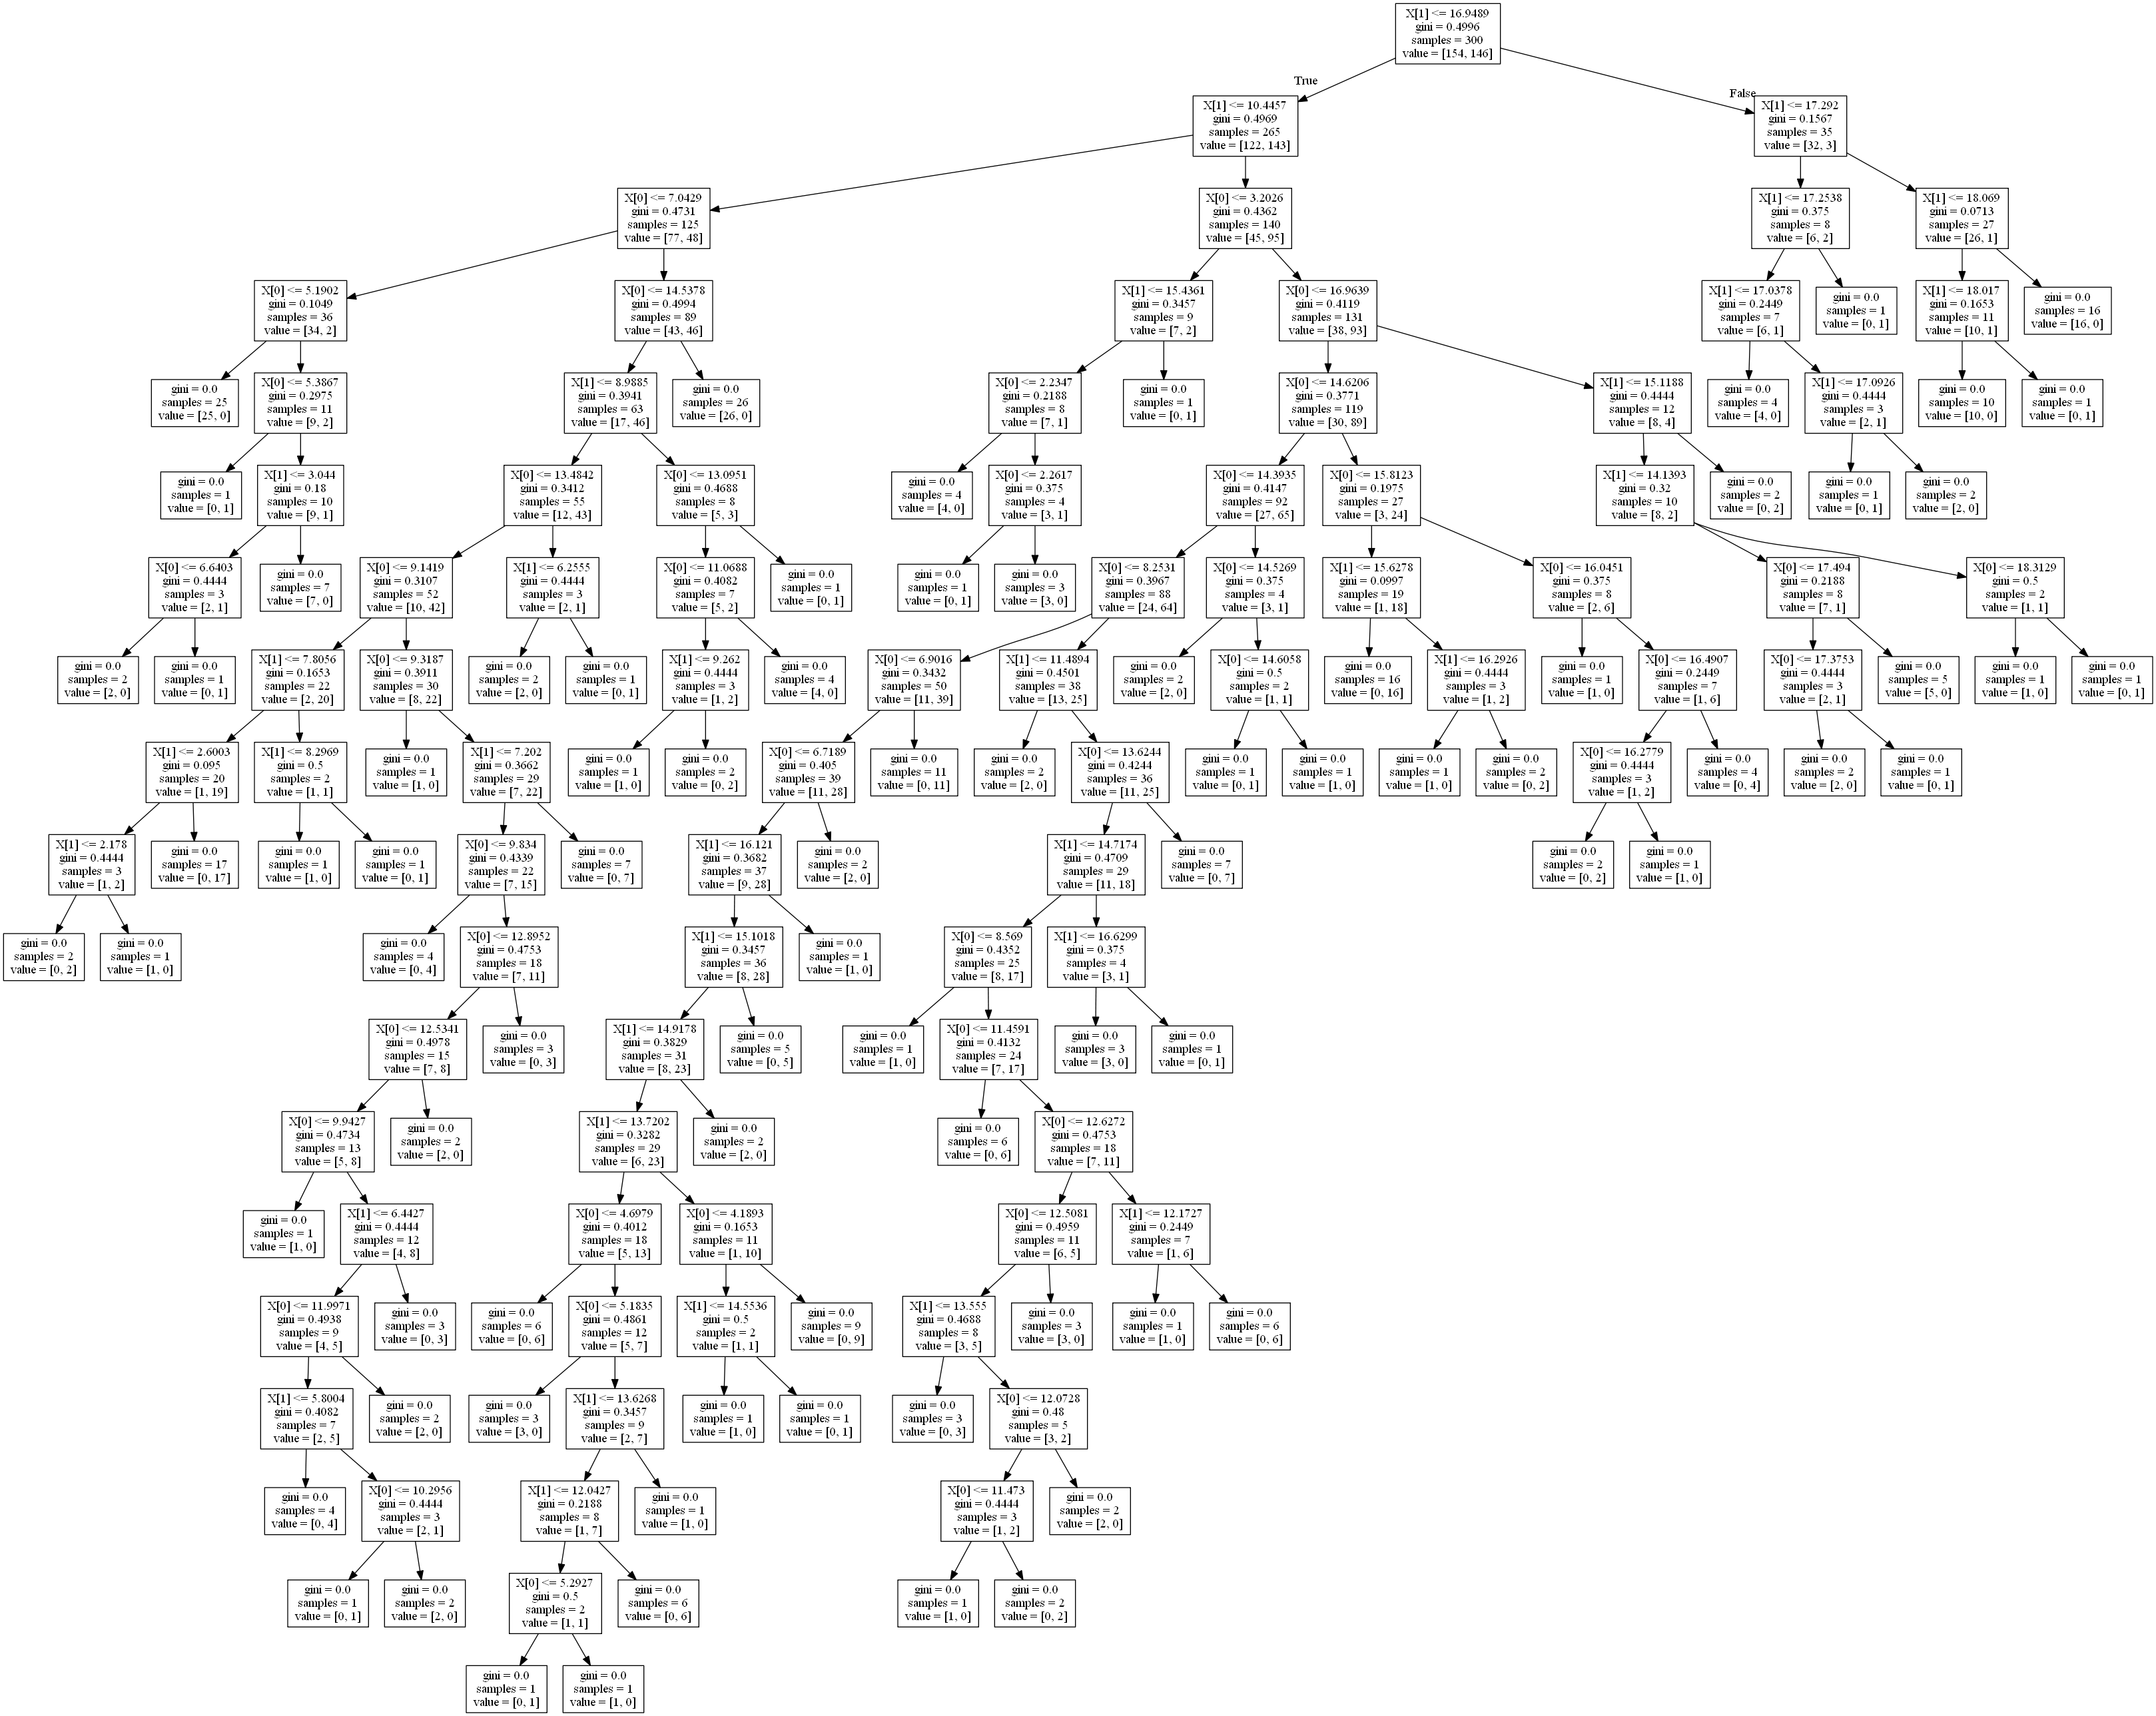

In [12]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [13]:
import pandas as p

data = p.read_csv('diabetes.csv',header='infer')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [14]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop('class',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [15]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
tree_acc

0.67804878048780493

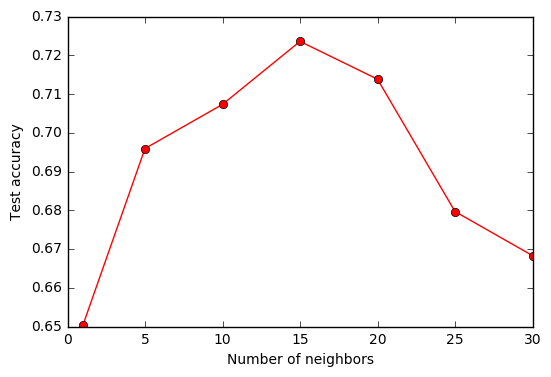

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

([<matplotlib.axis.XTick at 0xef73400>,
 <a list of 4 Text xticklabel objects>)

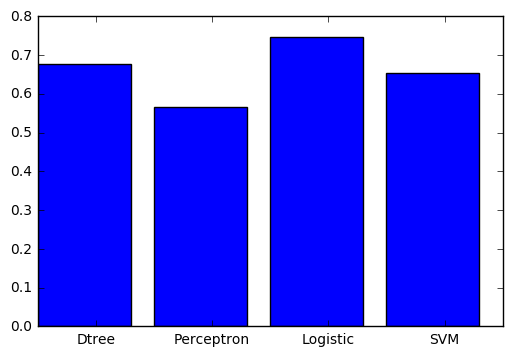

In [17]:
from sklearn import linear_model
from sklearn.svm import SVC

clf = linear_model.Perceptron()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
perceptron_acc = accuracy_score(Y_test, Y_pred)

clf = linear_model.LogisticRegression(C=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
logistic_acc = accuracy_score(Y_test, Y_pred)

clf = SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
svm_acc = accuracy_score(Y_test, Y_pred)

methods = ['Dtree', 'Perceptron', 'Logistic', 'SVM']
acc = [tree_acc, perceptron_acc, logistic_acc, svm_acc]
plt.bar([1,2,3,4], acc)
plt.xticks([1.5,2.5,3.5,4.5], methods)

([<matplotlib.axis.XTick at 0xdfb4390>,
 <a list of 4 Text xticklabel objects>)

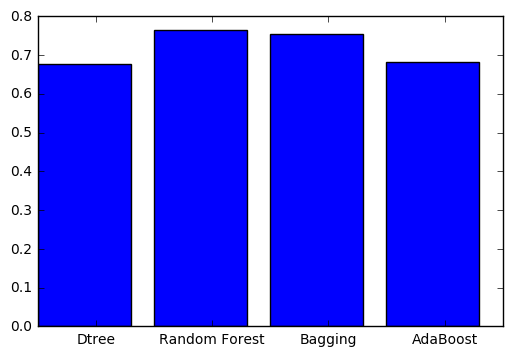

In [62]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500

methods = ['Random Forest', 'AdaBoost']
ensemble_acc = [tree_acc]

clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

methods = ['Dtree', 'Random Forest', 'Bagging', 'AdaBoost']
plt.bar([1,2,3,4], ensemble_acc)
plt.xticks([1.5,2.5,3.5,4.5], methods)